## Amanda Cesario's notebook for DS Final Project
### Question 5: How does IonQ's risk factors change over time?
### Group 3 members: Cole Barrett, Caterina Grossi, Connor Steward
This notebook is my process for cleaning my OpenAI results, as well as visualizing my outputs for analyzing the change in IonQ's risk factors section in 2021 vs. 2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter

In [2]:
# Cleaning function since there was some issue when extracting my observations (represented in the df's later)
def split_phrases(text):
    # First, split only on hyphens that have whitespace on both sides
    phrases = re.split(r'\s+-\s+', text)
    # Then, remove any leading hyphen and extra whitespace from each phrase
    cleaned_phrases = [re.sub(r'^-\s*', '', phrase).strip() for phrase in phrases]
    return cleaned_phrases

# Noun Phrases

In [3]:
NP21 = pd.read_csv('2021 NPs.csv')
NP21.head()

,Chunk Number,Noun Phrases
0,1,- Risk Factors\n- investment\n- securities\n- ...
1,2,- Form 10-K\n- Decision\n- Investment\n- Units...
2,3,- event\n- trading price\n- securities\n- inve...
3,4,- rating history\n- no revenues\n- basis\n- ab...
4,5,"initial business combination, vote, holders, f..."


In [4]:
NP24 = pd.read_csv('2024 NPs.csv')
NP24.head()

,Chunk Number,Noun Phrases
0,1,- Item 1A\n- Risk factors\n- Our securities\n-...
1,2,- Cautionary Note \n- Forward-Looking Statemen...
2,3,- Annual Report\n- events\n- developments\n- b...
3,4,- common stock\n- all or part of your investme...
4,5,- risks\n- our business\n- a number\n- immater...


In [5]:
# Need to get rid of the new line strings, for some reason they printed and saved when extracting in OpenAI notebook
NP21['Noun Phrases'] = NP21['Noun Phrases'].astype(str).str.replace('\n', ' ', regex=False).str.strip()
NP24['Noun Phrases'] = NP24['Noun Phrases'].astype(str).str.replace('\n', ' ', regex=False).str.strip()

In [6]:
# Checks if cleaning was done properly
print(NP21['Noun Phrases'][NP21['Noun Phrases'].str.contains('\n')])
print(NP24['Noun Phrases'][NP24['Noun Phrases'].str.contains('\n')])

Series([], Name: Noun Phrases, dtype: object)
Series([], Name: Noun Phrases, dtype: object)


In [9]:
# Function to count the noun phrases in order to rank them for comparison

def get_phrase_frequencies(df, column_name='Noun Phrases'):
    # Apply the splitting function to create a list of phrases for each row
    df['Phrases_List'] = df[column_name].apply(split_phrases)
    
    # Flatten the list of lists into a single list
    all_phrases = [phrase for sublist in df['Phrases_List'] for phrase in sublist]
    
    # Count frequencies using pandas' value_counts (or you can use Counter)
    freq_series = pd.Series(all_phrases).value_counts()
    return freq_series

In [10]:
# Using function on the dataframes
freq_2021 = get_phrase_frequencies(NP21)
freq_2024 = get_phrase_frequencies(NP24)

print("Top 10 for 2021:")
print(freq_2021.head(10))

print("\nTop 10 for 2024:")
print(freq_2024.head(10))

Top 10 for 2021:
initial business combination    176
business combination             57
trust account                    57
Class A common stock             52
stockholders                     45
public stockholders              42
shares                           39
warrants                         39
directors                        34
target business                  31
Name: count, dtype: int64

Top 10 for 2024:
business                 57
financial condition      53
our business             45
results of operations    38
products                 28
quantum computers        27
ability                  26
third parties            23
customers                22
regulations              21
Name: count, dtype: int64


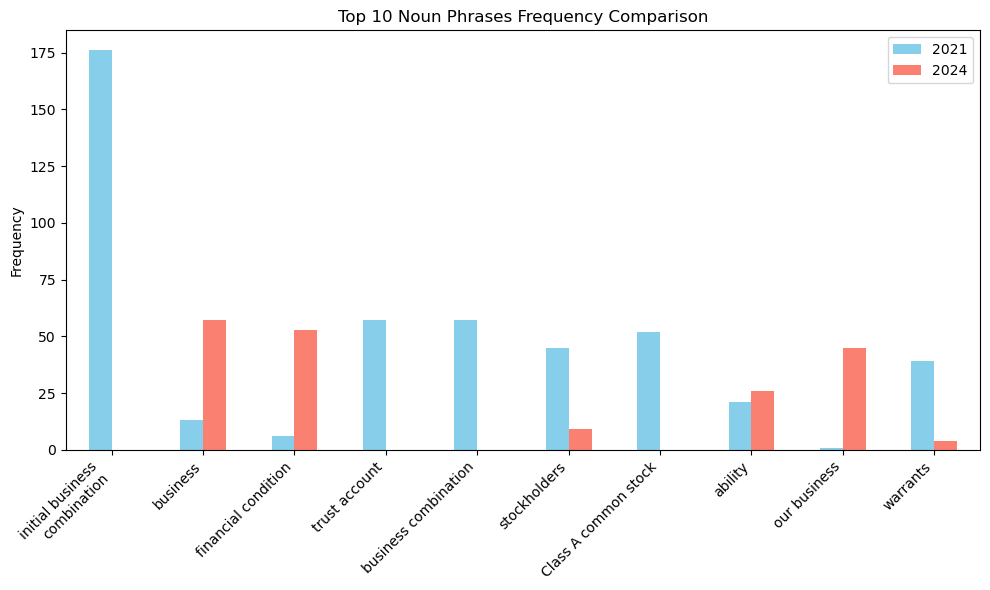

In [40]:
import textwrap # So the text on the graph looks tidy

# Merge the frequency series into one DataFrame with the noun phrase as index
df_merged = pd.concat([freq_2021, freq_2024], axis=1, keys=['2021', '2024']).fillna(0)
df_merged = df_merged.astype(int)

# Create a 'Total' column to identify the overall top phrases
df_merged['Total'] = df_merged['2021'] + df_merged['2024']

# Select top 10 phrases based on total frequency
df_top10 = df_merged.sort_values('Total', ascending=False).head(10)
df_top10 = df_top10.drop(columns='Total')

# Plot grouped bar chart
ax = df_top10.plot(kind='bar', figsize=(10, 6), color=["skyblue", "salmon"])
plt.title("Top 10 Noun Phrases Frequency Comparison")
plt.ylabel("Frequency")

# Wrap the noun phrases for the x-axis labels
wrapped_labels = [textwrap.fill(label, width=20) for label in df_top10.index]
ax.set_xticklabels(wrapped_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Named Entity Recognition - Didn't do
Time didn't allow for this, but also wasn't sure how to incorporate it since I used entity relationships. This might be something I want to look into more if I had more time. However, the same process from the noun phrases and entity relationship sections would be the same for NER section

In [12]:
NER21 = pd.read_csv('2021_NER.csv')
NER21.head()

,Chunk Number,Named Entities
0,1,"{'text': '\n\n{""securities"": ""Item 1A"", ""risk ..."
1,2,"{'text': '\n {\n ""Form 10-K"": ""Produ..."
2,3,"{'text': '\n {\n ""that event"": ""Even..."
3,4,"{'text': '\n [{""entity"": ""rating history"", ..."
4,5,"{'text': '\n{\n ""initial business combination..."


In [13]:
NER24 = pd.read_csv('2024_NER.csv')
NER24.head()

,Chunk Number,Named Entities
0,1,"{'text': '\n {\n ""Item 1A"": ""entity""..."
1,2,"{'text': '\n {\n ""Above"": ""Organizat..."
2,3,"{'text': '\n{\n ""Annual Report"": ""Publicati..."
3,4,"{'text': '\n {""entities"": [\n {""name..."
4,5,"{'text': '\n{\n ""named_entities"": [\n {\n ..."


# Entity Relationships

In [14]:
df21 = pd.read_csv('2021_Relationships.csv')
df21.head()

,Chunk Number,Relationship Extraction
0,1,{'text': '\n JSON Output: \n [\n ...
1,2,"{'text': '""triples"": [\n {\n ..."
2,3,"{'text': '\n [\n {\n ""ent..."
3,4,{'text': '\n JSON output: \n {\n ...
4,5,"{'text': '\n\n[\n {\n ""entity"": ""ini..."


In [15]:
df24 = pd.read_csv('2024_Relationships.csv')
df24.head()

,Chunk Number,Relationship Extraction
0,1,"{'text': '\n\n ""triples"": [\n {\n ..."
1,2,"{'text': '\n[\n {\n ""entity"": ""Cauti..."
2,3,"{'text': 'r stock could decline, and the\n\n\n..."
3,4,{'text': '\n \n JSON Output: \n {\n ...
4,5,"{'text': '\nJSON Output:\n[\n {\n ""triple""..."


In [16]:
# Function to clean the relationships since there was a lot of unnecessary characters, just want the (entity:relationship) pairs
def extract_entity_relationships(text):
    # Remove curly braces and newline characters
    cleaned_text = text.replace('\n', ' ').replace('{', '').replace('}', '')
    # Find all key-value pairs using the regex pattern
    pairs = re.findall(r'"([^"]+)"\s*:\s*"([^"]+)"', cleaned_text)
    return pairs

In [17]:
# Apply the function to the DataFrame and store the results in a new column
df21['entity_relationship_pairs'] = df21['Relationship Extraction'].apply(extract_entity_relationships)

df21.head()

,Chunk Number,Relationship Extraction,entity_relationship_pairs
0,1,{'text': '\n JSON Output: \n [\n ...,"[(subject, investment), (predicate, involves),..."
1,2,"{'text': '""triples"": [\n {\n ...","[(subject, Form 10-K), (relation, making), (ob..."
2,3,"{'text': '\n [\n {\n ""ent...","[(entity, event), (type, noun_phrase), (entity..."
3,4,{'text': '\n JSON output: \n {\n ...,"[(subject, rating history), (relationship, no ..."
4,5,"{'text': '\n\n[\n {\n ""entity"": ""ini...","[(entity, initial business combination), (sema..."


In [18]:
df24['entity_relationship_pairs'] = df24['Relationship Extraction'].apply(extract_entity_relationships)

In [19]:
df24.head()

,Chunk Number,Relationship Extraction,entity_relationship_pairs
0,1,"{'text': '\n\n ""triples"": [\n {\n ...","[(subject, Item 1A), (predicate, contains), (o..."
1,2,"{'text': '\n[\n {\n ""entity"": ""Cauti...","[(entity, Cautionary Note Regarding Forward-Lo..."
2,3,"{'text': 'r stock could decline, and the\n\n\n...","[(entity, Annual Report), (type, document), (r..."
3,4,{'text': '\n \n JSON Output: \n {\n ...,"[(subject, common stock), (predicate, could de..."
4,5,"{'text': '\nJSON Output:\n[\n {\n ""triple""...","[(entity, business), (type, noun phrase), (ent..."


In [20]:
# Function to count up the entities for comparison

def count_entities(df, column='entity_relationship_pairs'):
    # Flatten all entity values from each pair in the column
    all_entities = [entity for pair_list in df[column] for entity, _ in pair_list]
    # Get frequency counts using pandas value_counts
    freq = pd.Series(all_entities).value_counts()
    return freq

In [21]:
# For df21 and df24, count the entities
freq_21 = count_entities(df21)
freq_24 = count_entities(df24)

# Display the top 10 entities for each year
print("Top entities in 2021:")
print(freq_21.head(10))

print("\nTop entities in 2024:")
print(freq_24.head(10))

Top entities in 2021:
semantic_type    1632
type             1397
entity           1215
subject           583
predicate         541
object            535
noun_phrase       526
phrase            267
relationship      241
text              192
Name: count, dtype: int64

Top entities in 2024:
semantic_type    1834
type             1670
entity           1261
predicate         741
subject           734
object            663
noun_phrase       563
phrase            393
Semantic Type     275
text              254
Name: count, dtype: int64


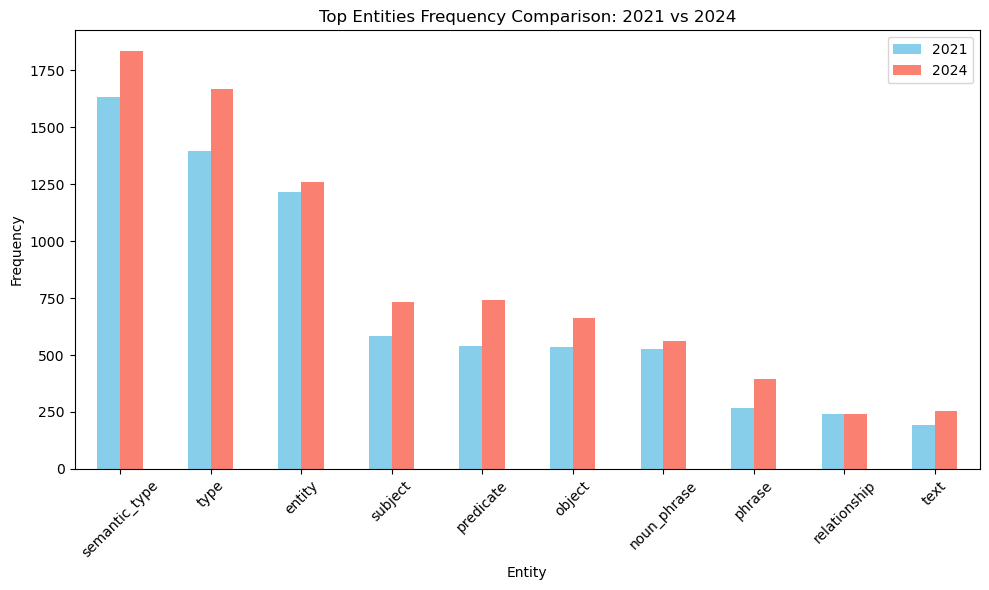

In [22]:
# Merge the two frequency counts into a single DataFrame
df_compare = pd.DataFrame({'2021': freq_21, '2024': freq_24}).fillna(0)
# Optionally, sort by one year and take the top 10 for easier viewing
df_compare = df_compare.sort_values('2021', ascending=False).head(10)

# Plot a grouped bar chart to compare the frequencies
ax = df_compare.plot(kind='bar', figsize=(10, 6), color=["skyblue", "salmon"])
ax.set_title("Top Entities Frequency Comparison: 2021 vs 2024")
ax.set_xlabel("Entity")
ax.set_ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Polarity Scores

In [23]:
p21 = pd.read_csv('2021_Polarity.csv')
p21.head()

,Chunk Number,Polarity Score
0,1,{'text': '\n-0.8'}
1,2,{'text': '\n-0.3'}
2,3,{'text': '\n-0.6'}
3,4,{'text': '\n-0.7'}
4,5,{'text': '\n-0.2'}


In [24]:
p24 = pd.read_csv('2024_Polarity.csv')
p24.head()

,Chunk Number,Polarity Score
0,1,{'text': '\n-0.2'}
1,2,{'text': '\n\n0.0'}
2,3,{'text': '\n-0.2'}
3,4,{'text': '\n-1'}
4,5,{'text': '\n-0.5'}


In [25]:
# Only wanted the numeric number, this function extracts it

def extract_polarity(text):
    """
    Extracts a polarity score from a string formatted like {'text': '\n-0.8'}.
    Returns the score as a float or None if not found.
    """
    if not isinstance(text, str):
        return None
    # Use regex to search for a decimal number (which may include a negative sign)
    match = re.search(r'-?\d+\.\d+', text)
    if match:
        return float(match.group())
    return None

In [26]:
p21['score'] = p21['Polarity Score'].apply(extract_polarity)

In [27]:
p21

,Chunk Number,Polarity Score,score
0,1,{'text': '\n-0.8'},-0.8
1,2,{'text': '\n-0.3'},-0.3
2,3,{'text': '\n-0.6'},-0.6
3,4,{'text': '\n-0.7'},-0.7
4,5,{'text': '\n-0.2'},-0.2
...,...,...,...
823,824,{'text': '\nThe sentiment of this text is neut...,NaN
824,825,{'text': '\n0.0'},0.0
825,826,{'text': '\n 0.0'},0.0
826,827,{'text': '\n0.0'},0.0


In [28]:
p24['score'] = p24['Polarity Score'].apply(extract_polarity)
p24

,Chunk Number,Polarity Score,score
0,1,{'text': '\n-0.2'},-0.20
1,2,{'text': '\n\n0.0'},0.00
2,3,{'text': '\n-0.2'},-0.20
3,4,{'text': '\n-1'},NaN
4,5,{'text': '\n-0.5'},-0.50
...,...,...,...
944,945,{'text': '\n 0'},NaN
945,946,{'text': '\n0.0'},0.00
946,947,{'text': '\n0.1'},0.10
947,948,{'text': '\n0'},NaN


# Combining my noun phrases with my polarity scores

In [29]:
# For graph purposes, the noun phrases would appear too long and visualization would be messy

def shorten_phrase(phrase, max_length=30):
    return (phrase[:max_length] + '...') if len(phrase) > max_length else phrase

In [30]:
merged_df = pd.concat([NP21, p21['score']], axis=1)
merged_df

,Chunk Number,Noun Phrases,Phrases_List,score
0,1,- Risk Factors - investment - securities - hig...,"[Risk Factors, investment, securities, high de...",-0.8
1,2,- Form 10-K - Decision - Investment - Units - ...,"[Form 10-K, Decision, Investment, Units, Event...",-0.3
2,3,- event - trading price - securities - investm...,"[event, trading price, securities, investment,...",-0.6
3,4,- rating history - no revenues - basis - abili...,"[rating history, no revenues, basis, ability, ...",-0.7
4,5,"initial business combination, vote, holders, f...","[initial business combination, vote, holders, ...",-0.2
...,...,...,...,...
823,824,- Exchange Act - rules and regulations - feder...,"[Exchange Act, rules and regulations, federal ...",NaN
824,825,- the resolution - any complaint - cause of ac...,"[the resolution, any complaint, cause of actio...",0.0
825,826,- acquiring any interest - our securities - th...,"[acquiring any interest, our securities, these...",0.0
826,827,- consistency - application - Delaware law - t...,"[consistency, application, Delaware law, types...",0.0


In [31]:
merged_df2 = pd.concat([NP24, p24['score']], axis=1)
merged_df2

,Chunk Number,Noun Phrases,Phrases_List,score
0,1,- Item 1A - Risk factors - Our securities - Hi...,"[Item 1A, Risk factors, Our securities, High d...",-0.20
1,2,- Cautionary Note - Forward-Looking Statement...,"[Cautionary Note, Forward-Looking Statements, ...",0.00
2,3,- Annual Report - events - developments - busi...,"[Annual Report, events, developments, business...",-0.20
3,4,- common stock - all or part of your investmen...,"[common stock, all or part of your investment,...",NaN
4,5,- risks - our business - a number - immaterial...,"[risks, our business, a number, immaterial, Su...",-0.50
...,...,...,...,...
944,945,- outside fractional Chief Information Securit...,[outside fractional Chief Information Security...,NaN
945,946,- governance risk and compliance - security en...,"[governance risk and compliance, security engi...",0.00
946,947,- industry standard security tools - program -...,"[industry standard security tools, program, ev...",0.10
947,948,- cross functional team - members of senior ma...,"[cross functional team, members of senior mana...",NaN


### 2021

In [32]:
# Sort the merged dataframe by the polarity scores (assuming you want highest positive scores)
top10 = merged_df.sort_values(by='score', ascending=False).head(10)
print(top10[['Noun Phrases', 'score']])

                                          Noun Phrases  score
331  - November 14, 2020 - sponsor - aggregate - fo...   0.50
255  - management team - extensive experience - str...   0.50
425  - such amendments - approval - stockholders - ...   0.50
112  - initial business combination - Any such purc...   0.50
580  - the company - such opportunity - we - direct...   0.50
407  - special purpose acquisition companies - abil...   0.30
74   - the timeframe described above - limited time...   0.30
164  - best interests - company - circumstances - u...   0.25
267  candidate, us, business combination opportunit...   0.25
277  - holder approval - business - legal reasons -...   0.20


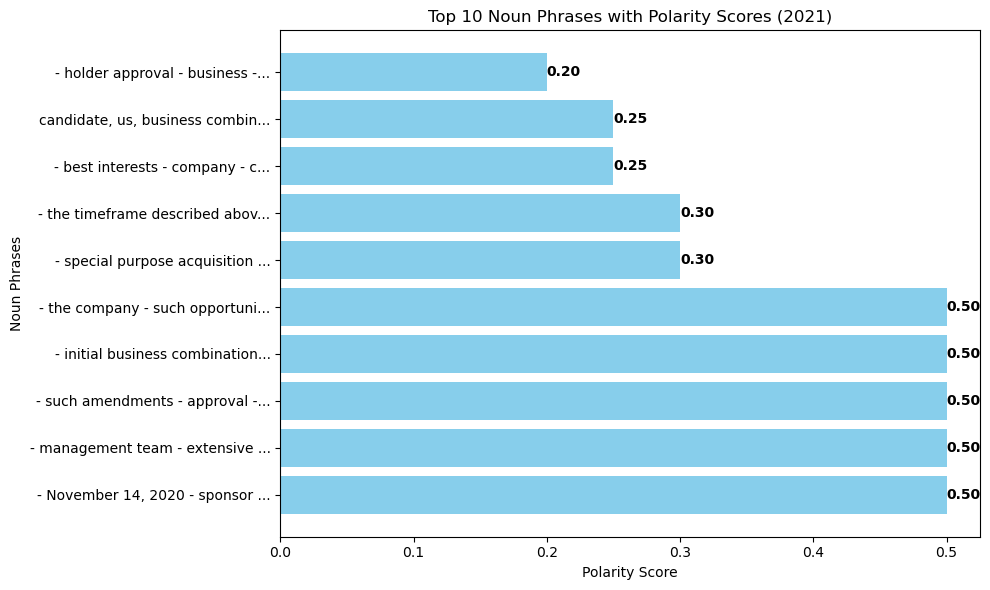

In [33]:
top10['short_phrases'] = top10['Noun Phrases'].apply(shorten_phrase)

plt.figure(figsize=(10, 6))
bars = plt.barh(top10['short_phrases'], top10['score'], color='skyblue')
plt.xlabel('Polarity Score')
plt.ylabel('Noun Phrases')
plt.title('Top 10 Noun Phrases with Polarity Scores (2021)')

# Annotate each bar with its polarity score, formatted to two decimals
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}',
             va='center', ha='left', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

In [34]:
bot10 = merged_df.sort_values(by='score', ascending=True).head(10)
print(bot10[['Noun Phrases', 'score']])

                                          Noun Phrases  score
668  - closing of the initial public offering - no ...  -0.94
592  - executive officers - directors - security ho...  -0.90
0    - Risk Factors - investment - securities - hig...  -0.80
811  - lawsuits - directors and officers - amended ...  -0.80
378  - initial business combination - substantial m...  -0.80
329  - sponsor - executive officers - directors - e...  -0.80
156  - estimated $10.00 per share - redemption - pu...  -0.80
144  public stockholders, our warrants, net proceed...  -0.80
12   - stockholders - search - business combination...  -0.80
777  - initial business combination - operating rev...  -0.80


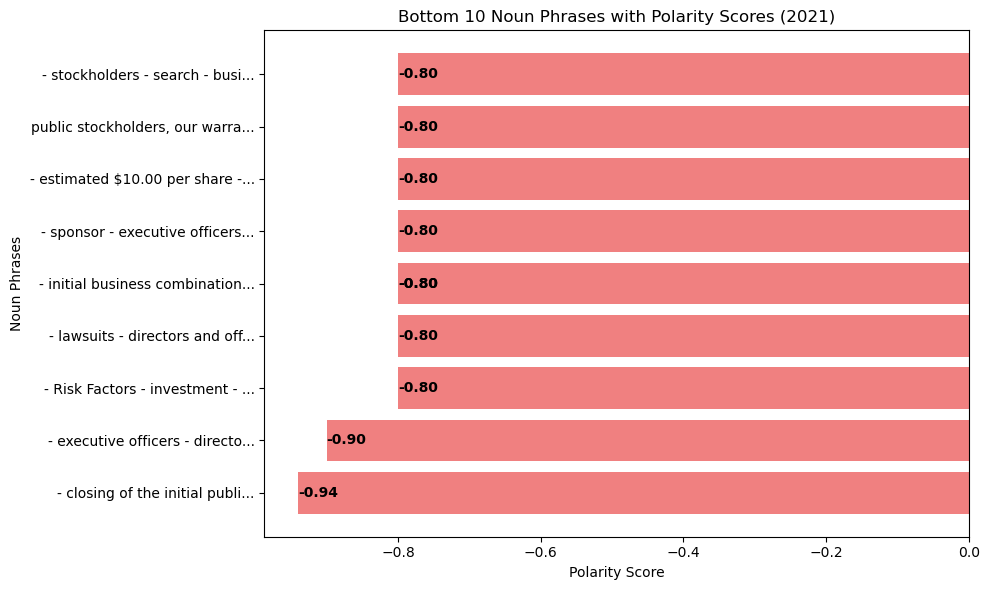

In [35]:
bot10['short_phrases'] = bot10['Noun Phrases'].apply(shorten_phrase)

plt.figure(figsize=(10, 6))
bars = plt.barh(bot10['short_phrases'], bot10['score'], color='lightcoral')
plt.xlabel('Polarity Score')
plt.ylabel('Noun Phrases')
plt.title('Bottom 10 Noun Phrases with Polarity Scores (2021)')

# Annotate each bar with its polarity score, formatted to two decimals
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}',
             va='center', ha='left', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

### 2024

In [36]:
top10_2 = merged_df2.sort_values(by='score', ascending=False).head(10)
print(top10_2[['Noun Phrases', 'score']])

                                          Noun Phrases  score
208  - ease of administration - use - scalability -...    0.7
131  - holders or groups of stockholders - company'...    0.7
838  - timely prevention - material misstatements -...    0.6
115  - our business - our ability - our growth - ou...    0.5
725  - patents - protection - competitors - technol...    0.5
147  - our ability - a sufficiently large number - ...    0.5
387  - security measures - industry-standard - reas...    0.5
188  - Quantum advantage - Many applications - Deve...    0.5
175  - quantum computing hardware - system control ...    0.5
222  - growth and future demand - our products - ad...    0.5


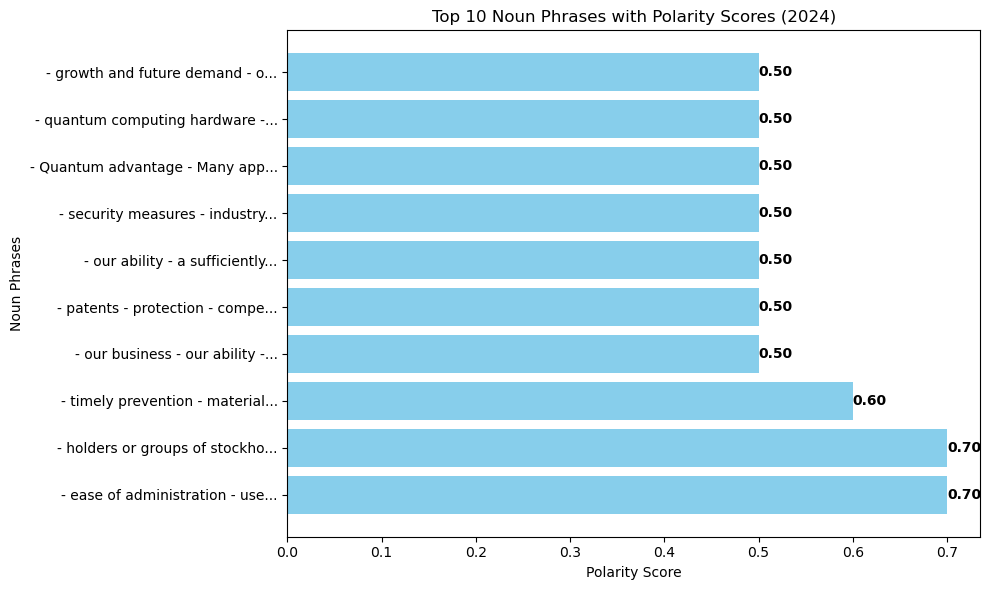

In [37]:
top10_2['short_phrases'] = top10_2['Noun Phrases'].apply(shorten_phrase)

plt.figure(figsize=(10, 6))
bars = plt.barh(top10_2['short_phrases'], top10_2['score'], color='skyblue')
plt.xlabel('Polarity Score')
plt.ylabel('Noun Phrases')
plt.title('Top 10 Noun Phrases with Polarity Scores (2024)')

# Annotate each bar with its polarity score, formatted to two decimals
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}',
             va='center', ha='left', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

In [38]:
bot10_2 = merged_df2.sort_values(by='score', ascending=True).head(10)
print(bot10_2[['Noun Phrases', 'score']])

                                          Noun Phrases  score
861  - exercise price - public warrants - share of ...  -0.95
829  1. rice requirement 2. NYSE  3. steps  4. deli...  -0.90
486  - jurisdictions - additional international exp...  -0.90
737  - non-infringing products - services - technol...  -0.90
156  - user experience - disruptions - outages - de...  -0.90
871  - disadvantageous - warrant holders - such war...  -0.90
512  - disgorgement of profits - fines - civil and ...  -0.80
228  - operations - progress towards quantum advant...  -0.80
30   - patent protection - products - technology - ...  -0.80
141  - scalable ways - qubits - their number - quan...  -0.80


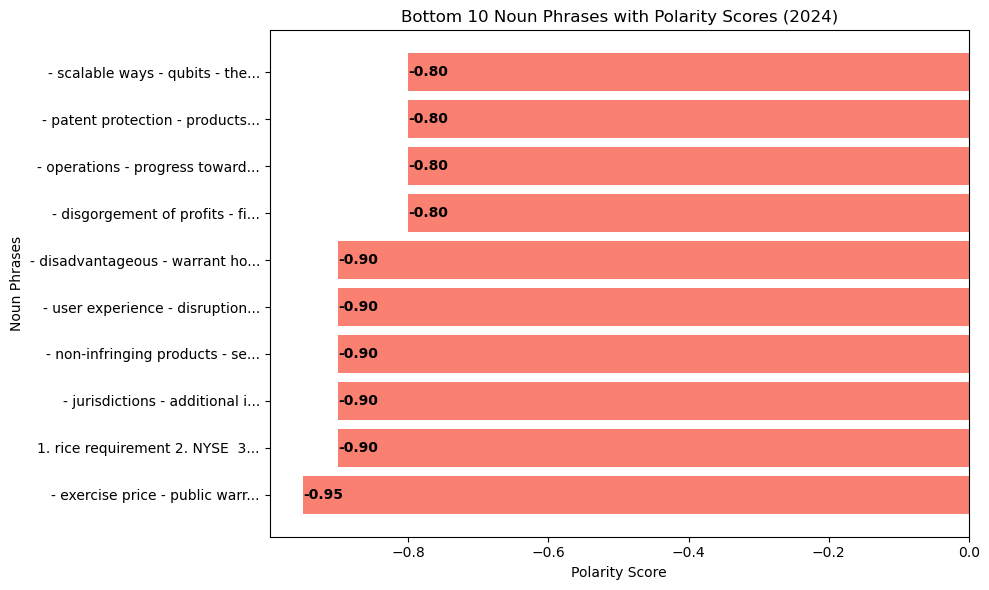

In [39]:
bot10_2['short_phrases'] = bot10_2['Noun Phrases'].apply(shorten_phrase)

plt.figure(figsize=(10, 6))
bars = plt.barh(bot10_2['short_phrases'], bot10_2['score'], color='salmon')
plt.xlabel('Polarity Score')
plt.ylabel('Noun Phrases')
plt.title('Bottom 10 Noun Phrases with Polarity Scores (2024)')

# Annotate each bar with its score (formatted to 2 decimal places)
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

### Entity Relationships w/ scores - Didn't do
Again, time didn't allow to incorporate this, but definitely a good start to continue and see the relationships. I need to refine it for future work.

In [41]:
merged_relations = pd.concat([df21, p21['score']], axis=1)
merged_relations

,Chunk Number,Relationship Extraction,entity_relationship_pairs,score
0,1,{'text': '\n JSON Output: \n [\n ...,"[(subject, investment), (predicate, involves),...",-0.8
1,2,"{'text': '""triples"": [\n {\n ...","[(subject, Form 10-K), (relation, making), (ob...",-0.3
2,3,"{'text': '\n [\n {\n ""ent...","[(entity, event), (type, noun_phrase), (entity...",-0.6
3,4,{'text': '\n JSON output: \n {\n ...,"[(subject, rating history), (relationship, no ...",-0.7
4,5,"{'text': '\n\n[\n {\n ""entity"": ""ini...","[(entity, initial business combination), (sema...",-0.2
...,...,...,...,...
823,824,{'text': '\n Noun Phrases:\n - Exchange ...,"[(Semantic Type, Legal Relationship), (Subject...",NaN
824,825,{'text': '\n Noun phrases:\n 1. resoluti...,[],0.0
825,826,"{'text': '\n\n {\n ""noun_phrases"": [...","[(phrase, interest), (type, noun), (phrase, se...",0.0
826,827,"{'text': '\n\n[\n {\n ""key"": ""consistency""...","[(key, consistency), (type, noun phrase), (sem...",0.0


In [46]:
# Explode the list so each pair is in its own row
df_exploded = merged_relations.explode('entity_relationship_pairs')

# If the entity_relationship_pairs are stored as tuples, convert them to separate columns
df_exploded[['entity', 'relationship']] = pd.DataFrame(
    df_exploded['entity_relationship_pairs'].tolist(), 
    index=df_exploded.index
)

# Now display the desired columns:
print(df_exploded[['entity', 'relationship', 'score']].head(10))

      entity    relationship  score
0    subject      investment   -0.8
0  predicate        involves   -0.8
0     object            risk   -0.8
0       type  InvestmentRisk   -0.8
0    subject      securities   -0.8
0  predicate        involves   -0.8
0     object            risk   -0.8
0       type  InvestmentRisk   -0.8
0    subject         Item 1A   -0.8
0  predicate        contains   -0.8


In [53]:
# First, aggregate the polarity scores by chunk (using the mean as an example)
chunk_scores = df_exploded.groupby('Chunk Number')['score'].mean()

# Find the chunk with the highest and lowest average polarity scores
max_chunk = chunk_scores.idxmax()
min_chunk = chunk_scores.idxmin()

# Filter the exploded dataframe for rows belonging to those chunks
top_chunk = df_exploded[df_exploded['Chunk Number'] == max_chunk]
bottom_chunk = df_exploded[df_exploded['Chunk Number'] == min_chunk]

print("Chunk with highest polarity (average score = {:.2f}):".format(chunk_scores[max_chunk]))
print(top_chunk[['Chunk Number', 'entity', 'relationship', 'score']])

print("\nChunk with lowest polarity (average score = {:.2f}):".format(chunk_scores[min_chunk]))
print(bottom_chunk[['Chunk Number', 'entity', 'relationship', 'score']])

Chunk with highest polarity (average score = 0.50):
     Chunk Number entity relationship  score
112           113    NaN         None    0.5

Chunk with lowest polarity (average score = -0.94):
     Chunk Number       entity  \
668           669      subject   
668           669    predicate   
668           669       object   
668           669  triple_type   
668           669      subject   
668           669    predicate   
668           669       object   
668           669  triple_type   
668           669      subject   
668           669    predicate   
668           669       object   
668           669  triple_type   

                                          relationship  score  
668             Closing of the initial public offering  -0.94  
668                                          has value  -0.94  
668  No value ascribed to the warrants included in ...  -0.94  
668                                     Value ascribed  -0.94  
668                                Public 

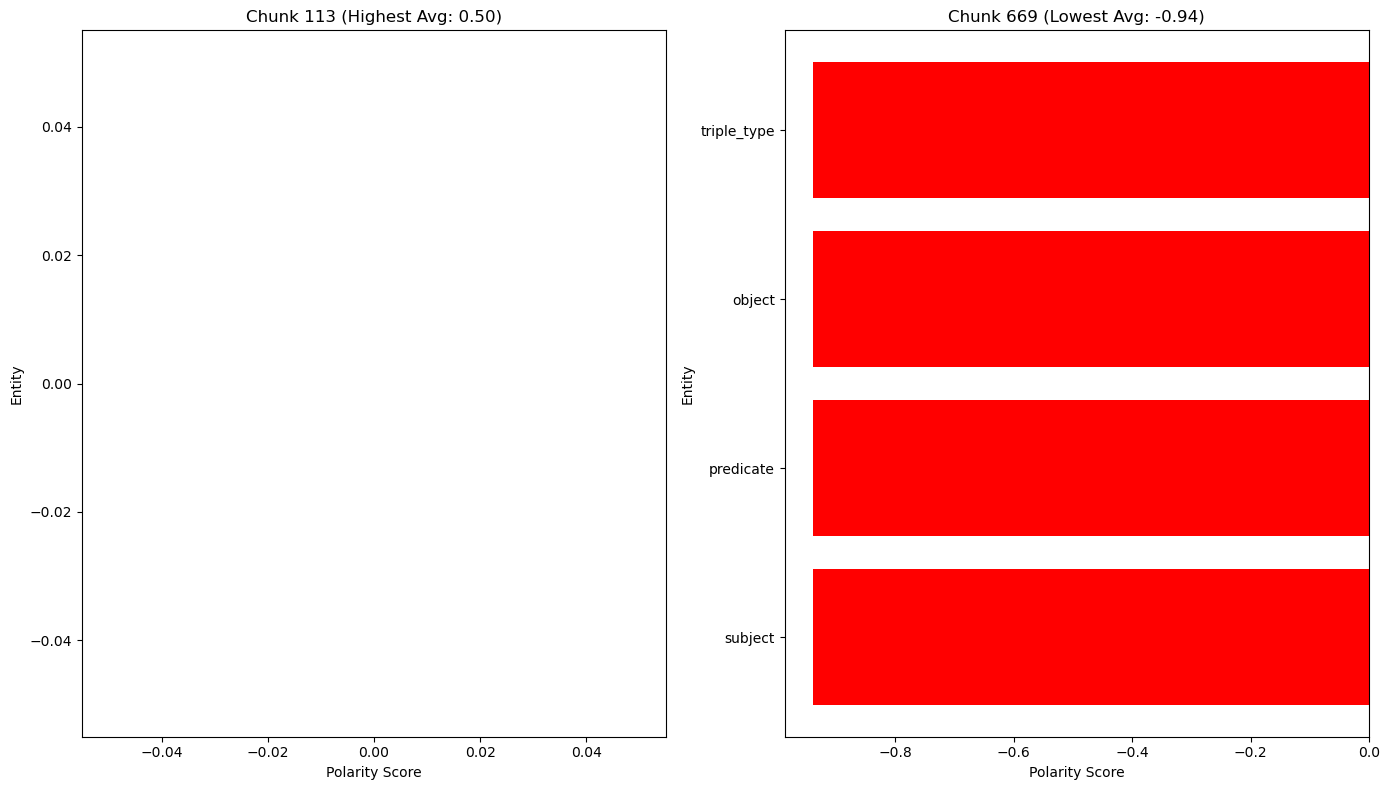

In [54]:
# Create a figure with two subplots (one for each extreme chunk)
fig, axs = plt.subplots(ncols=2, figsize=(14, 8))

# Plot for the chunk with the highest polarity scores
axs[0].barh(top_chunk['entity'], top_chunk['score'], color='green')
axs[0].set_title(f'Chunk {max_chunk} (Highest Avg: {chunk_scores[max_chunk]:.2f})')
axs[0].set_xlabel('Polarity Score')
axs[0].set_ylabel('Entity')

# Plot for the chunk with the lowest polarity scores
axs[1].barh(bottom_chunk['entity'], bottom_chunk['score'], color='red')
axs[1].set_title(f'Chunk {min_chunk} (Lowest Avg: {chunk_scores[min_chunk]:.2f})')
axs[1].set_xlabel('Polarity Score')
axs[1].set_ylabel('Entity')

plt.tight_layout()
plt.show()